<a href="https://colab.research.google.com/github/rittase/actigraphy/blob/main/29Jan26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Check drive mounted or no
**bold text**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




---



#Actigraphy(1)
this part is a history.  I don't really need (?)

In [ ]:
data_folder = "/content/drive/Computers/My Computer/Documents/Insulin/actigraphy/VectorMagnitudeData/2.4"


In [ ]:
import os

if os.path.exists('/content/drive/MyDrive'):
    print("✅ Drive is mounted!")
else:
    print("❌ Drive is NOT mounted.")

✅ Drive is mounted!


In [ ]:
!pip install pandas openpyxl

In [ ]:
import pandas as pd
import os
import numpy as np

#15Jan26 - cleaned data - rerunning.  planning/hoping to run stats (2wayANOVA)
# --- SETTINGS ---
base_path = "/content/drive/Othercomputers/My Computer/Documents/Insulin/actigraphy/VectorMagnitudeData"
cohorts = ["2.1", "2.2", "2.3", "2.4"]
summary_rows = []

for cohort_id in cohorts:
    data_folder = os.path.join(base_path, cohort_id)
    if not os.path.exists(data_folder):
        print(f"⚠️ Folder {cohort_id} not found, skipping.")
        continue

    print(f"--- Processing Cohort {cohort_id} ---")
    files = [f for f in os.listdir(data_folder) if f.endswith((".xlsx", ".xls")) and not f.startswith('.')]

    for file in files:
        filepath = os.path.join(data_folder, file)
        subject_id = os.path.splitext(file)[0]

        try:
            xls = pd.ExcelFile(filepath, engine='openpyxl')
            for sheet in xls.sheet_names:
                df_raw = pd.read_excel(xls, sheet_name=sheet, header=None)

                # Metadata
                treatment = df_raw.iloc[0, 2]

                # Data Alignment
                vm_raw = pd.to_numeric(df_raw.iloc[3:, 2], errors='coerce')
                time_raw = pd.to_datetime(df_raw.iloc[3:, 1], format='%H:%M:%S', errors='coerce').dt.time
                valid_indices = vm_raw.notnull() & time_raw.notnull()

                vm = vm_raw[valid_indices].reset_index(drop=True)
                times = time_raw[valid_indices].reset_index(drop=True)

                # --- CLEANING CHECK (Option B) ---
                # If you cleared Column C, vm will be empty or all zeros.
                # We skip if no data exists.
                if vm.empty or len(vm) < 10: # skipping if fewer than 10 mins of data
                    print(f"   Skipping empty/cleaned sheet: {file} -> {sheet}")
                    continue

                # Circadian Logic
                day_start, day_end = pd.to_datetime('07:00:00').time(), pd.to_datetime('18:59:59').time()
                is_day = np.array([(t >= day_start and t <= day_end) for t in times])

                # Inactivity Bouts
                is_zero = (vm == 0).astype(int)
                abs_diff = is_zero.diff().ne(0).cumsum()
                zero_bouts = is_zero[is_zero == 1].groupby(abs_diff).count()

                summary_rows.append({
                    "Cohort": cohort_id,
                    "SubjectID": subject_id,
                    "Treatment": treatment,
                    "TimePoint": sheet,
                    "MeanVM_Total": vm.mean(),
                    "Mean_Day": vm[is_day].mean() if any(is_day) else 0,
                    "Mean_Night": vm[~is_day].mean() if any(~is_day) else 0,
                    "MaxInactiveBout": zero_bouts.max() if not zero_bouts.empty else 0,
                    "PropZero": (vm == 0).mean()
                })
        except Exception as e:
            print(f"⚠️ Error in {file}: {e}")

# Save the master file
full_summary_df = pd.DataFrame(summary_rows)
full_summary_df.to_csv(os.path.join(base_path, "Grand_Master_Summary.csv"), index=False)

print("\n✅ All Cohorts Processed!")

# --- DATA POINT FEEDBACK ---
print("\n--- Summary of Data Points Collected ---")
print(full_summary_df.groupby(['Cohort', 'Treatment']).size().unstack(fill_value=0))

--- Processing Cohort 2.1 ---
   Skipping empty/cleaned sheet: 733-vm.xlsx -> 733 BL(2)
   Skipping empty/cleaned sheet: 078-vm.xlsx -> 078 12dpi
--- Processing Cohort 2.2 ---
   Skipping empty/cleaned sheet: 804-vm.xlsx -> 804 26dpi
--- Processing Cohort 2.3 ---
   Skipping empty/cleaned sheet: 912-vm.xlsx -> 912-12dpi
   Skipping empty/cleaned sheet: 912-vm.xlsx -> 912-19dpi
   Skipping empty/cleaned sheet: 807-vm.xlsx -> 807-BL(2)
   Skipping empty/cleaned sheet: 807-vm.xlsx -> 807-5dpi
   Skipping empty/cleaned sheet: 807-vm.xlsx -> 807-12dpi
   Skipping empty/cleaned sheet: 807-vm.xlsx -> 807-19dpi
   Skipping empty/cleaned sheet: 807-vm.xlsx -> 807-26dpi
   Skipping empty/cleaned sheet: 793-vm.xlsx -> 793-12dpi
   Skipping empty/cleaned sheet: 793-vm.xlsx -> 793-19dpi
   Skipping empty/cleaned sheet: 374-vm.xlsx -> 374-19dpi
   Skipping empty/cleaned sheet: 340-vm.xlsx -> 340-5dpi
   Skipping empty/cleaned sheet: 340-vm.xlsx -> 340-12dpi
   Skipping empty/cleaned sheet: 340-vm.xl

In [ ]:
import pandas as pd
import os
import numpy as np

# - timepioint taken from cell I1

# --- SETTINGS ---
base_path = "/content/drive/Othercomputers/My Computer/Documents/Insulin/actigraphy/VectorMagnitudeData"
cohorts = ["2.1", "2.2", "2.3", "2.4"]
summary_rows = []

for cohort_id in cohorts:
    data_folder = os.path.join(base_path, cohort_id)
    if not os.path.exists(data_folder):
        print(f"⚠️ Folder {cohort_id} not found, skipping.")
        continue

    print(f"--- Processing Cohort {cohort_id} ---")
    files = [f for f in os.listdir(data_folder) if f.endswith((".xlsx", ".xls")) and not f.startswith('.')]

    for file in files:
        filepath = os.path.join(data_folder, file)
        subject_id = os.path.splitext(file)[0]

        try:
            xls = pd.ExcelFile(filepath, engine='openpyxl')
            for sheet in xls.sheet_names:
                df_raw = pd.read_excel(xls, sheet_name=sheet, header=None)

                # --- METADATA EXTRACTION ---
                # Cell C1 (0, 2) and Cell I1 (0, 8)
                treatment = str(df_raw.iloc[0, 2]).strip()
                timepoint = str(df_raw.iloc[0, 8]).strip()

                # Data Alignment (Column C and Column B)
                vm_raw = pd.to_numeric(df_raw.iloc[3:, 2], errors='coerce')
                time_raw = pd.to_datetime(df_raw.iloc[3:, 1], format='%H:%M:%S', errors='coerce').dt.time
                valid_indices = vm_raw.notnull() & time_raw.notnull()

                vm = vm_raw[valid_indices].reset_index(drop=True)
                times = time_raw[valid_indices].reset_index(drop=True)

                # --- CLEANING CHECK (Skip if Column C was cleared) ---
                if vm.empty or len(vm) < 10:
                    continue

                # Circadian Logic
                day_start, day_end = pd.to_datetime('07:00:00').time(), pd.to_datetime('18:59:59').time()
                is_day = np.array([(t >= day_start and t <= day_end) for t in times])

                # Inactivity Bouts
                is_zero = (vm == 0).astype(int)
                abs_diff = is_zero.diff().ne(0).cumsum()
                zero_bouts = is_zero[is_zero == 1].groupby(abs_diff).count()

                summary_rows.append({
                    "Cohort": cohort_id,
                    "SubjectID": subject_id,
                    "Treatment": treatment,
                    "TimePoint": timepoint,
                    "MeanVM_Total": vm.mean(),
                    "Mean_Day": vm[is_day].mean() if any(is_day) else 0,
                    "Mean_Night": vm[~is_day].mean() if any(~is_day) else 0,
                    "MaxInactiveBout": zero_bouts.max() if not zero_bouts.empty else 0,
                    "PropZero": (vm == 0).mean()
                })
        except Exception as e:
            print(f"⚠️ Error in {file}: {e}")

# Save the master file
full_summary_df = pd.DataFrame(summary_rows)
full_summary_df.to_csv(os.path.join(base_path, "Grand_Master_Summary.csv"), index=False)

print("\n✅ All Cohorts Processed!")

# --- DATA POINT FEEDBACK ---
# This table shows you exactly how many valid timepoints exist per Treatment per Cohort
print("\n--- Summary of Valid Data Points Collected ---")
pivot_feedback = full_summary_df.pivot_table(index=['Cohort', 'Treatment'],
                                            columns='TimePoint',
                                            aggfunc='size',
                                            fill_value=0)
display(pivot_feedback)

--- Processing Cohort 2.1 ---
--- Processing Cohort 2.2 ---
--- Processing Cohort 2.3 ---
--- Processing Cohort 2.4 ---

✅ All Cohorts Processed!

--- Summary of Valid Data Points Collected ---


,TimePoint,12.0,19.0,26.0,5.0,BL,baseline (1),nan
Cohort,Treatment,,,,,,,
2.1,vm,5,6,6,6,3,1,1
2.2,vm,5,5,5,5,6,0,3
2.3,vm,2,1,4,4,5,0,0
2.4,vm,6,6,4,5,6,0,0


In [ ]:
import pandas as pd
import os
import numpy as np

# - timepioint taken from cell I1
# - cleaned data more based on output from last run

# --- SETTINGS ---
base_path = "/content/drive/Othercomputers/My Computer/Documents/Insulin/actigraphy/VectorMagnitudeData"
cohorts = ["2.1", "2.2", "2.3", "2.4"]
summary_rows = []

for cohort_id in cohorts:
    data_folder = os.path.join(base_path, cohort_id)
    if not os.path.exists(data_folder):
        print(f"⚠️ Folder {cohort_id} not found, skipping.")
        continue

    print(f"--- Processing Cohort {cohort_id} ---")
    files = [f for f in os.listdir(data_folder) if f.endswith((".xlsx", ".xls")) and not f.startswith('.')]

    for file in files:
        filepath = os.path.join(data_folder, file)
        subject_id = os.path.splitext(file)[0]

        try:
            xls = pd.ExcelFile(filepath, engine='openpyxl')
            for sheet in xls.sheet_names:
                df_raw = pd.read_excel(xls, sheet_name=sheet, header=None)

                # --- METADATA EXTRACTION ---
                # Cell C1 (0, 2) and Cell I1 (0, 8)
                treatment = str(df_raw.iloc[0, 2]).strip()
                timepoint = str(df_raw.iloc[0, 8]).strip()

                # Data Alignment (Column C and Column B)
                vm_raw = pd.to_numeric(df_raw.iloc[3:, 2], errors='coerce')
                time_raw = pd.to_datetime(df_raw.iloc[3:, 1], format='%H:%M:%S', errors='coerce').dt.time
                valid_indices = vm_raw.notnull() & time_raw.notnull()

                vm = vm_raw[valid_indices].reset_index(drop=True)
                times = time_raw[valid_indices].reset_index(drop=True)

                # --- CLEANING CHECK (Skip if Column C was cleared) ---
                if vm.empty or len(vm) < 10:
                    continue

                # Circadian Logic
                day_start, day_end = pd.to_datetime('07:00:00').time(), pd.to_datetime('18:59:59').time()
                is_day = np.array([(t >= day_start and t <= day_end) for t in times])

                # Inactivity Bouts
                is_zero = (vm == 0).astype(int)
                abs_diff = is_zero.diff().ne(0).cumsum()
                zero_bouts = is_zero[is_zero == 1].groupby(abs_diff).count()

                summary_rows.append({
                    "Cohort": cohort_id,
                    "SubjectID": subject_id,
                    "Treatment": treatment,
                    "TimePoint": timepoint,
                    "MeanVM_Total": vm.mean(),
                    "Mean_Day": vm[is_day].mean() if any(is_day) else 0,
                    "Mean_Night": vm[~is_day].mean() if any(~is_day) else 0,
                    "MaxInactiveBout": zero_bouts.max() if not zero_bouts.empty else 0,
                    "PropZero": (vm == 0).mean()
                })
        except Exception as e:
            print(f"⚠️ Error in {file}: {e}")

# Save the master file
full_summary_df = pd.DataFrame(summary_rows)
full_summary_df.to_csv(os.path.join(base_path, "Grand_Master_Summary.csv"), index=False)

print("\n✅ All Cohorts Processed!")

# --- DATA POINT FEEDBACK ---
# This table shows you exactly how many valid timepoints exist per Treatment per Cohort
print("\n--- Summary of Valid Data Points Collected ---")
pivot_feedback = full_summary_df.pivot_table(index=['Cohort', 'Treatment'],
                                            columns='TimePoint',
                                            aggfunc='size',
                                            fill_value=0)
display(pivot_feedback)

--- Processing Cohort 2.1 ---
--- Processing Cohort 2.2 ---
⚠️ Error in ~$600-vm.xlsx: File is not a zip file
--- Processing Cohort 2.3 ---
--- Processing Cohort 2.4 ---

✅ All Cohorts Processed!

--- Summary of Valid Data Points Collected ---


,TimePoint,12.0,19.0,26.0,5.0,BL
Cohort,Treatment,,,,,
2.1,vm,5,6,6,6,5
2.2,vm,6,6,5,6,6
2.3,vm,2,1,4,4,5
2.4,vm,6,6,4,5,6


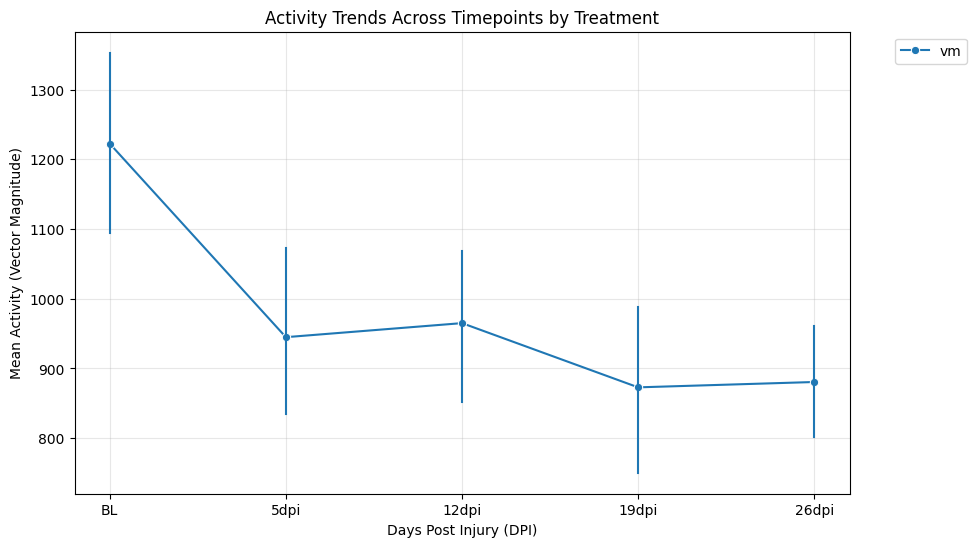

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# We want to make sure the timepoints are in the right order (BL first, then 5dpi, etc.)
# Update this list to match your exact TimePoint names in order
time_order = ['BL', '5dpi', '12dpi', '19dpi', '26dpi']

plt.figure(figsize=(10, 6))
sns.lineplot(data=full_summary_df,
             x='TimePoint',
             y='MeanVM_Total',
             hue='Treatment',
             marker='o',
             err_style='bars',
             sort=False)

plt.title('Activity Trends Across Timepoints by Treatment')
plt.ylabel('Mean Activity (Vector Magnitude)')
plt.xlabel('Days Post Injury (DPI)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(ticks=range(len(time_order)), labels=time_order)
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
import pandas as pd
import os
import numpy as np

base_path = "/content/drive/Othercomputers/My Computer/Documents/Insulin/actigraphy/VectorMagnitudeData"
cohorts = ["2.1", "2.2", "2.3", "2.4"]
summary_rows = []

for cohort_id in cohorts:
    data_folder = os.path.join(base_path, cohort_id)
    if not os.path.exists(data_folder):
        continue

    print(f"--- Processing Cohort {cohort_id} ---")
    files = [f for f in os.listdir(data_folder) if f.endswith((".xlsx", ".xls")) and not f.startswith('.')]

    for file in files:
        filepath = os.path.join(data_folder, file)
        subject_id = os.path.splitext(file)[0]

        try:
            xls = pd.ExcelFile(filepath, engine='openpyxl')
            for sheet in xls.sheet_names:
                df_raw = pd.read_excel(xls, sheet_name=sheet, header=None)

                # --- CORRECTED COORDINATES ---
                treatment = str(df_raw.iloc[0, 6]).strip() # F1
                timepoint = str(df_raw.iloc[0, 8]).strip() # I1

                vm_raw = pd.to_numeric(df_raw.iloc[3:, 2], errors='coerce')
                time_raw = pd.to_datetime(df_raw.iloc[3:, 1], format='%H:%M:%S', errors='coerce').dt.time
                valid_indices = vm_raw.notnull() & time_raw.notnull()

                vm = vm_raw[valid_indices].reset_index(drop=True)
                times = time_raw[valid_indices].reset_index(drop=True)

                if vm.empty or len(vm) < 10:
                    continue

                day_start, day_end = pd.to_datetime('07:00:00').time(), pd.to_datetime('18:59:59').time()
                is_day = np.array([(t >= day_start and t <= day_end) for t in times])

                is_zero = (vm == 0).astype(int)
                abs_diff = is_zero.diff().ne(0).cumsum()
                zero_bouts = is_zero[is_zero == 1].groupby(abs_diff).count()

                summary_rows.append({
                    "Cohort": cohort_id,
                    "SubjectID": subject_id,
                    "Treatment": treatment,
                    "TimePoint": timepoint,
                    "MeanVM_Total": vm.mean(),
                    "Mean_Day": vm[is_day].mean() if any(is_day) else 0,
                    "Mean_Night": vm[~is_day].mean() if any(~is_day) else 0,
                    "MaxInactiveBout": zero_bouts.max() if not zero_bouts.empty else 0,
                    "PropZero": (vm == 0).mean()
                })
        except Exception as e:
            print(f"⚠️ Error in {file}: {e}")

full_summary_df = pd.DataFrame(summary_rows)
full_summary_df.to_csv(os.path.join(base_path, "Grand_Master_Summary.csv"), index=False)

print("\n✅ All Cohorts Processed with Treatment from F1!")
# Re-display the feedback to make sure the groups look right now
pivot_feedback = full_summary_df.pivot_table(index=['Cohort', 'Treatment'], columns='TimePoint', aggfunc='size', fill_value=0)
display(pivot_feedback)

--- Processing Cohort 2.1 ---
⚠️ Error in ~$078-vm.xlsx: File is not a zip file
--- Processing Cohort 2.2 ---
--- Processing Cohort 2.3 ---
--- Processing Cohort 2.4 ---

✅ All Cohorts Processed with Treatment from F1!


TimePoint            12.0  19.0  26.0  5.0  BL
Cohort Treatment                              
2.1    Sham+Insulin     1     1     1    1   1
       Sham+Saline      1     1     1    1   1
       TBI+Insulin      1     2     2    2   1
       TBI+Saline       2     2     2    2   2
2.2    Sham+Insulin     1     1     1    1   1
       Sham+Saline      1     1     1    1   1
       TBI+Insulin      2     2     1    2   2
       TBI+Saline       2     2     2    2   2
2.3    Sham+Insulin     0     0     1    1   1
       Sham+Saline      0     0     1    1   1
       TBI+Insulin      2     1     2    2   2
       TBI+Saline       0     0     0    0   1
2.4    Sham+Insulin     1     1     0    0   1
       Sham+Saline      1     1     1    1   1
       TBI+Insulin      2     2     1    2   2
       TBI+saline       2     2     2    2   2

Below is graph
code written to make graph, but just here in python

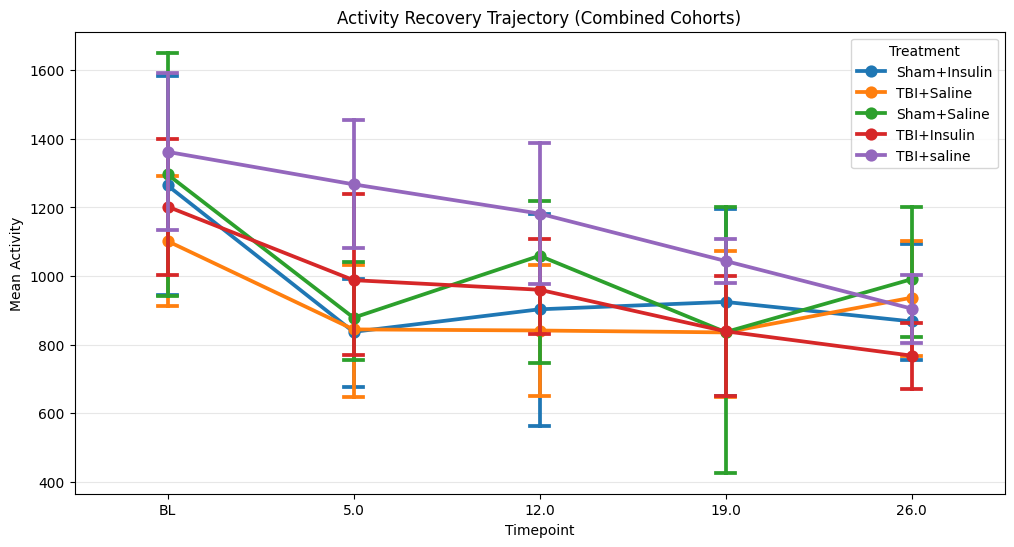

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.pointplot(data=full_summary_df, x='TimePoint', y='MeanVM_Total', hue='Treatment', capsize=.1)
plt.title('Activity Recovery Trajectory (Combined Cohorts)')
plt.ylabel('Mean Activity')
plt.xlabel('Timepoint')
plt.grid(axis='y', alpha=0.3)
plt.show()

# **Grand Master Script**
 updated 21Jan (corrections to where start to collect data)
this was good (I think)
but, I should add
# Re-display the feedback to make sure the groups look right now - needs this part
table from previous efforts - just to double check data

---



In [ ]:
import pandas as pd
import os
import numpy as np

base_path = "/content/drive/Othercomputers/My Computer/Documents/Insulin/actigraphy/VectorMagnitudeData"
cohorts = ["2.1", "2.2", "2.3", "2.4"]
summary_rows = []

for cohort_id in cohorts:
    data_folder = os.path.join(base_path, cohort_id)
    if not os.path.exists(data_folder): continue

    print(f"--- Processing Cohort {cohort_id} ---")
    files = [f for f in os.listdir(data_folder) if f.endswith((".xlsx", ".xls")) and not f.startswith('.')]

    for file in files:
        filepath = os.path.join(data_folder, file)
        subject_id = os.path.splitext(file)[0]

        try:
            xls = pd.ExcelFile(filepath, engine='openpyxl')
            for sheet in xls.sheet_names:
                df_raw = pd.read_excel(xls, sheet_name=sheet, header=None)

                # --- CORRECTED COORDINATES: G1 and I1 ---
                treatment = str(df_raw.iloc[0, 6]).strip() # G1 is Index 6
                timepoint = str(df_raw.iloc[0, 8]).strip() # I1 is Index 8

                vm_raw = pd.to_numeric(df_raw.iloc[1:, 2], errors='coerce')
                time_raw = pd.to_datetime(df_raw.iloc[1:, 1], format='%H:%M:%S', errors='coerce').dt.time
                valid_indices = vm_raw.notnull() & time_raw.notnull()

                vm = vm_raw[valid_indices].reset_index(drop=True)
                times = time_raw[valid_indices].reset_index(drop=True)

                if vm.empty or len(vm) < 10: continue

                day_start, day_end = pd.to_datetime('07:00:00').time(), pd.to_datetime('18:59:59').time()
                is_day = np.array([(t >= day_start and t <= day_end) for t in times])

                is_zero = (vm == 0).astype(int)
                abs_diff = is_zero.diff().ne(0).cumsum()
                zero_bouts = is_zero[is_zero == 1].groupby(abs_diff).count()

                summary_rows.append({
                    "Cohort": cohort_id,
                    "SubjectID": subject_id,
                    "Treatment": treatment,
                    "TimePoint": timepoint,
                    "MeanVM_Total": vm.mean(),
                    "Mean_Day": vm[is_day].mean() if any(is_day) else 0,
                    "Mean_Night": vm[~is_day].mean() if any(~is_day) else 0,
                    "MaxInactiveBout": zero_bouts.max() if not zero_bouts.empty else 0,
                    "PropZero": (vm == 0).mean()
                })
        except Exception as e:
            print(f"⚠️ Error in {file}: {e}")

full_summary_df = pd.DataFrame(summary_rows)
full_summary_df.to_csv(os.path.join(base_path, "Grand_Master_Summary.csv"), index=False)
print("\n✅ All Cohorts Processed with Treatment from G1!")

--- Processing Cohort 2.1 ---
⚠️ Error in ~$276-vm.xlsx: File is not a zip file
--- Processing Cohort 2.2 ---
--- Processing Cohort 2.3 ---
--- Processing Cohort 2.4 ---

✅ All Cohorts Processed with Treatment from G1!


**full summary data Audit - from data in Colab memory, i.e. just ran the script**


In [ ]:
# This creates a grid showing counts of subjects per Treatment per TimePoint
feedback_table = full_summary_df.pivot_table(index='Treatment',
                                            columns='TimePoint',
                                            aggfunc='size',
                                            fill_value=0)

print("--- Data Point Audit: Number of subjects per group ---")
display(feedback_table)

--- Data Point Audit: Number of subjects per group ---


TimePoint,12.0,19.0,26.0,5.0,BL
Treatment,,,,,
Sham+Insulin,3,3,3,3,4
Sham+Saline,3,3,4,4,4
TBI+Insulin,7,7,6,8,7
TBI+Saline,6,6,6,6,7


**Pivot table with "correct" timepoint order**

this is not critical

makes pivot table excel file from Grand Master Summary

Grand Master Summary is the raw data (important)


In [ ]:
import pandas as pd
import os

# 1. Load the summary
base_path = "/content/drive/Othercomputers/My Computer/Documents/Insulin/actigraphy/VectorMagnitudeData"
df = pd.read_csv(os.path.join(base_path, "Grand_Master_Summary.csv"))

# 2. Create the Pivot Table naturally (it will be alphabetical for now)
pivot_df = df.pivot_table(index='TimePoint',
                          columns='Treatment',
                          values='MeanVM_Total',
                          aggfunc='mean')

# 3. List the order you want.
# NOTE: Make sure these match your Excel cells EXACTLY (case sensitive)
my_order = ['BL', '5dpi', '12dpi', '19dpi', '26dpi']

# 4. Reindex: This just moves rows around without deleting data
# We only reindex with labels that actually exist in the pivot table index
existing_labels = [label for label in my_order if label in pivot_df.index]
other_labels = [label for label in pivot_df.index if label not in my_order]

ordered_pivot = pivot_df.reindex(existing_labels + other_labels)

# 5. SAVE TO EXCEL
output_file = os.path.join(base_path, "Ordered_Pivot_Summary.xlsx")
ordered_pivot.to_excel(output_file)

print("--- Ordered Pivot Table ---")
display(ordered_pivot)

print("\n--- Diagnostic: Every unique label found in your CSV ---")
print(df['TimePoint'].unique())

--- Ordered Pivot Table ---


Treatment,Sham+Insulin,Sham+Saline,TBI+Insulin,TBI+Saline
TimePoint,,,,
BL,1265.064844,1296.738108,1201.961806,1176.218800
12.0,902.311690,1058.884722,960.680109,954.238484
19.0,924.000810,836.824653,838.786756,904.503819
26.0,869.086690,991.447483,767.558796,926.120255
5.0,836.626042,877.875347,987.355859,984.708218



--- Diagnostic: Every unique label found in your CSV ---
['BL' '5.0' '12.0' '19.0' '26.0']


# **Excel file w graphs**
make sure order is correct for excel file (timepoint-below is correct)
force logical order - Sham, Sham+Insulin, TBI+Saline, TBI+Insulin

In [4]:
import pandas as pd
import os

!pip install xlsxwriter

# --- 1. SETTINGS ---
base_path = "/content/drive/Othercomputers/My Computer/Documents/Insulin/actigraphy/VectorMagnitudeData"
input_csv = os.path.join(base_path, "Grand_Master_Summary.csv")
output_excel = os.path.join(base_path, "Final_Actigraphy_Report_with_N.xlsx")

# Load your data
df = pd.read_csv(input_csv)

# --- 2. THE SORTING FIX ---
logical_order = ['BL', '5.0', '12.0', '19.0', '26.0']
df['TimePoint'] = df['TimePoint'].astype(str).str.strip()

# Variables to analyze
variables = ['MeanVM_Total', 'Mean_Day', 'Mean_Night', 'MaxInactiveBout', 'PropZero']

# --- 3. EXCEL ENGINE START ---
writer = pd.ExcelWriter(output_excel, engine='xlsxwriter')
workbook = writer.book

for var in variables:
    # A. Calculate Mean, SD, and N (count) Pivot Tables
    mean_pivot = df.pivot_table(index='TimePoint', columns='Treatment', values=var, aggfunc='mean').reindex(logical_order)
    sd_pivot = df.pivot_table(index='TimePoint', columns='Treatment', values=var, aggfunc='std').reindex(logical_order)
    n_pivot = df.pivot_table(index='TimePoint', columns='Treatment', values=var, aggfunc='count').reindex(logical_order)

    # B. Write to a new Sheet
    sheet_name = var[:31]

    # Position the tables
    mean_pivot.to_excel(writer, sheet_name=sheet_name, startrow=0, startcol=0)

    worksheet = writer.sheets[sheet_name]
    worksheet.write(len(mean_pivot) + 2, 0, "Standard Deviation (SD)")
    sd_pivot.to_excel(writer, sheet_name=sheet_name, startrow=len(mean_pivot) + 3, startcol=0)

    worksheet.write(len(mean_pivot) + len(sd_pivot) + 5, 0, "Sample Size (N)")
    n_pivot.to_excel(writer, sheet_name=sheet_name, startrow=len(mean_pivot) + len(sd_pivot) + 6, startcol=0)

    # C. CREATE THE CHART (using the Mean data)
    chart = workbook.add_chart({'type': 'line'})

    # Data coordinates for error bars (linked to the SD table)
    sd_start_row = len(mean_pivot) + 4 # This matches the startrow of sd_pivot + header
    num_timepoints = len(mean_pivot)
    num_treatments = len(mean_pivot.columns)

    for i in range(num_treatments):
        col_idx = i + 1

        chart.add_series({
            'name':       [sheet_name, 0, col_idx],
            'categories': [sheet_name, 1, 0, num_timepoints, 0],
            'values':     [sheet_name, 1, col_idx, num_timepoints, col_idx],
            'marker':     {'type': 'circle', 'size': 5},
            'y_error_bars': {
                'type':         'custom',
                'plus_values':  [sheet_name, sd_start_row, col_idx, sd_start_row + num_timepoints - 1, col_idx],
                'minus_values': [sheet_name, sd_start_row, col_idx, sd_start_row + num_timepoints - 1, col_idx],
            },
        })

    chart.set_title({'name': f'Recovery Curve: {var}'})
    chart.set_x_axis({'name': 'Time Points'})
    chart.set_y_axis({'name': var})
    chart.set_size({'width': 750, 'height': 450})

    worksheet.insert_chart('G2', chart)

writer.close()
print(f"✅ Success! Report with N-values saved: {output_excel}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 4.4 MB/s eta 0:00:00
✅ Success! Report with N-values saved: /content/drive/Othercomputers/My Computer/Documents/Insulin/actigraphy/VectorMagnitudeData/Final_Actigraphy_Report_with_N.xlsx


# **Stats**

In [2]:
# 1. Install the missing engine
!pip install xlsxwriter

import pandas as pd
import os
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 2. Re-connect to your data
base_path = "/content/drive/Othercomputers/My Computer/Documents/Insulin/actigraphy/VectorMagnitudeData"
df = pd.read_csv(os.path.join(base_path, "Grand_Master_Summary.csv"))

# 3. Settings
logical_order = ['BL', '5.0', '12.0', '19.0', '26.0']
df['TimePoint'] = pd.Categorical(df['TimePoint'], categories=logical_order, ordered=True)
variables = ['MeanVM_Total', 'Mean_Day', 'Mean_Night', 'MaxInactiveBout', 'PropZero']

# 4. Prepare Excel Saver
stats_output = os.path.join(base_path, "Full_Statistical_Report.xlsx")
writer = pd.ExcelWriter(stats_output, engine='xlsxwriter')

print("--- Starting Batch Statistical Analysis ---")

for var in variables:
    print(f"\nProcessing: {var}...")

    # Run 2-Way ANOVA
    formula = f'{var} ~ C(Treatment) * C(TimePoint)'
    model = ols(formula, data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)

    # Run Tukey Post-Hoc
    df['Combo'] = df['Treatment'].astype(str) + "_" + df['TimePoint'].astype(str)
    m_comp = pairwise_tukeyhsd(endog=df[var], groups=df['Combo'], alpha=0.05)
    posthoc_df = pd.DataFrame(data=m_comp._results_table.data[1:], columns=m_comp._results_table.data[0])

    # Save to Excel
    sheet_name = var[:31]
    anova_table.to_excel(writer, sheet_name=sheet_name, startrow=0, startcol=0)
    posthoc_df.to_excel(writer, sheet_name=sheet_name, startrow=8, startcol=0)

writer.close()
print(f"\n✅ All stats saved to: {stats_output}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 2.6 MB/s eta 0:00:00
--- Starting Batch Statistical Analysis ---

Processing: MeanVM_Total...

Processing: Mean_Day...

Processing: Mean_Night...

Processing: MaxInactiveBout...

Processing: PropZero...

✅ All stats saved to: /content/drive/Othercomputers/My Computer/Documents/Insulin/actigraphy/VectorMagnitudeData/Full_Statistical_Report.xlsx


# **Percent change analysis**




In [4]:
import pandas as pd
import os
import numpy as np

# --- 1. SETTINGS & LOADING ---
base_path = "/content/drive/Othercomputers/My Computer/Documents/Insulin/actigraphy/VectorMagnitudeData"
input_csv = os.path.join(base_path, "Grand_Master_Summary.csv")
output_excel = os.path.join(base_path, "Percent_Change_Report_Advanced.xlsx")

df = pd.read_csv(input_csv)
df['TimePoint'] = df['TimePoint'].astype(str).str.strip()

# Variables to analyze
variables = ['MeanVM_Total', 'Mean_Day', 'Mean_Night', 'MaxInactiveBout', 'PropZero']

# --- 2. CALCULATE % CHANGE FROM BASELINE ---
def get_pct_change(group, vars_to_calc):
    bl_mask = group['TimePoint'] == 'BL'
    if bl_mask.any():
        for v in vars_to_calc:
            bl_val = group.loc[bl_mask, v].values[0]
            if bl_val != 0:
                group[f'{v}_PctChange'] = ((group[v] - bl_val) / bl_val) * 100
            else:
                group[f'{v}_PctChange'] = np.nan
    else:
        for v in vars_to_calc:
            group[f'{v}_PctChange'] = np.nan
    return group

df = df.groupby(['Cohort', 'SubjectID'], group_keys=False).apply(lambda x: get_pct_change(x, variables))

# --- 3. EXCEL GENERATION ---
writer = pd.ExcelWriter(output_excel, engine='xlsxwriter')
workbook = writer.book

# Focus on post-injury days
graph_order = ['5.0', '12.0', '19.0', '26.0']

for v in variables:
    col_name = f'{v}_PctChange'
    sheet_name = v[:31]

    # Create the 3 Pivot Tables
    mean_pivot = df.pivot_table(index='TimePoint', columns='Treatment', values=col_name, aggfunc='mean').reindex(graph_order)
    sd_pivot = df.pivot_table(index='TimePoint', columns='Treatment', values=col_name, aggfunc='std').reindex(graph_order)
    n_pivot = df.pivot_table(index='TimePoint', columns='Treatment', values=col_name, aggfunc='count').reindex(graph_order)

    # Position Tables on Sheet
    mean_pivot.to_excel(writer, sheet_name=sheet_name, startrow=0, startcol=0)

    worksheet = writer.sheets[sheet_name]
    worksheet.write(len(mean_pivot) + 2, 0, "Standard Deviation (SD)")
    sd_pivot.to_excel(writer, sheet_name=sheet_name, startrow=len(mean_pivot) + 3, startcol=0)

    worksheet.write(len(mean_pivot) + len(sd_pivot) + 5, 0, "Sample Size (N)")
    n_pivot.to_excel(writer, sheet_name=sheet_name, startrow=len(mean_pivot) + len(sd_pivot) + 6, startcol=0)

    # Coordinates for graphing
    sd_start_row = len(mean_pivot) + 4
    num_timepoints = len(mean_pivot)
    num_treatments = len(mean_pivot.columns)

    # --- 4. LINE CHART ---
    line_chart = workbook.add_chart({'type': 'line'})
    # --- 5. BAR CHART ---
    bar_chart = workbook.add_chart({'type': 'column'})

    for i in range(num_treatments):
        col_idx = i + 1
        series_config = {
            'name':       [sheet_name, 0, col_idx],
            'categories': [sheet_name, 1, 0, num_timepoints, 0],
            'values':     [sheet_name, 1, col_idx, num_timepoints, col_idx],
            'marker':     {'type': 'circle', 'size': 5},
            'y_error_bars': {
                'type':         'custom',
                'plus_values':  [sheet_name, sd_start_row, col_idx, sd_start_row + num_timepoints - 1, col_idx],
                'minus_values': [sheet_name, sd_start_row, col_idx, sd_start_row + num_timepoints - 1, col_idx],
            },
        }
        line_chart.add_series(series_config)
        bar_chart.add_series(series_config)

    # Chart Styling
    for chart in [line_chart, bar_chart]:
        chart.set_x_axis({'name': 'Days Post Injury'})
        chart.set_y_axis({'name': '% Change from Baseline', 'major_gridlines': {'visible': True}})
        chart.set_size({'width': 600, 'height': 350})

    line_chart.set_title({'name': f'Trajectory: {v} (% Change)'})
    bar_chart.set_title({'name': f'Comparison: {v} (% Change)'})

    # Insert Charts (Line on top, Bar below it)
    worksheet.insert_chart('G2', line_chart)
    worksheet.insert_chart('G22', bar_chart)

writer.close()
print(f"✅ Enhanced Percent Change Report created: {output_excel}")

✅ Enhanced Percent Change Report created: /content/drive/Othercomputers/My Computer/Documents/Insulin/actigraphy/VectorMagnitudeData/Percent_Change_Report_Advanced.xlsx


/tmp/ipython-input-803702282.py:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(['Cohort', 'SubjectID'], group_keys=False).apply(lambda x: get_pct_change(x, variables))


# **Stats for % Change Analysis**

In [5]:
import pandas as pd
import os
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# --- 1. SETTINGS & LOADING ---
base_path = "/content/drive/Othercomputers/My Computer/Documents/Insulin/actigraphy/VectorMagnitudeData"
input_csv = os.path.join(base_path, "Grand_Master_Summary.csv")
df = pd.read_csv(input_csv)

# Standardize labels
df['TimePoint'] = df['TimePoint'].astype(str).str.strip()
logical_order = ['BL', '5.0', '12.0', '19.0', '26.0']
variables = ['MeanVM_Total', 'Mean_Day', 'Mean_Night', 'MaxInactiveBout', 'PropZero']

# --- 2. CALCULATE % CHANGE ---
def get_pct_change(group, vars_to_calc):
    bl_mask = group['TimePoint'] == 'BL'
    if bl_mask.any():
        for v in vars_to_calc:
            bl_val = group.loc[bl_mask, v].values[0]
            if bl_val != 0:
                group[f'{v}_PctChange'] = ((group[v] - bl_val) / bl_val) * 100
            else:
                group[f'{v}_PctChange'] = None
    else:
        for v in vars_to_calc:
            group[f'{v}_PctChange'] = None
    return group

df_pct = df.groupby(['Cohort', 'SubjectID'], group_keys=False).apply(lambda x: get_pct_change(x, variables))

# --- 3. PREPARE STATS & EXCEL ---
stats_output = os.path.join(base_path, "Percent_Change_Statistical_Report.xlsx")
writer = pd.ExcelWriter(stats_output, engine='xlsxwriter')

print("--- Starting Stats for Percent Change Data ---")

for var in variables:
    col_name = f'{var}_PctChange'
    print(f"Analyzing: {col_name}...")

    # Filter out BL and drop any missing data
    temp_df = df_pct[df_pct['TimePoint'] != 'BL'].dropna(subset=[col_name]).copy()

    # A. 2-Way ANOVA
    formula = f'{col_name} ~ C(Treatment) * C(TimePoint)'
    model = ols(formula, data=temp_df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)

    # B. Tukey Post-Hoc
    temp_df['Combo'] = temp_df['Treatment'].astype(str) + "_" + temp_df['TimePoint'].astype(str)
    m_comp = pairwise_tukeyhsd(endog=temp_df[col_name], groups=temp_df['Combo'], alpha=0.05)
    posthoc_df = pd.DataFrame(data=m_comp._results_table.data[1:], columns=m_comp._results_table.data[0])
    posthoc_df = posthoc_df.sort_values('p-adj') # Best p-values at the top

    # C. Save to Excel
    sheet_name = var[:31]
    anova_table.to_excel(writer, sheet_name=sheet_name, startrow=0, startcol=0)
    posthoc_df.to_excel(writer, sheet_name=sheet_name, startrow=8, startcol=0)

writer.close()
print(f"\n✅ Percent Change Stats saved to: {stats_output}")

/tmp/ipython-input-2086751585.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_pct = df.groupby(['Cohort', 'SubjectID'], group_keys=False).apply(lambda x: get_pct_change(x, variables))
/tmp/ipython-input-2086751585.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_pct = df.groupby(['Cohort', 'SubjectID'], group_keys=False).apply(lambda x: get_pct_change(x, variables))


--- Starting Stats for Percent Change Data ---
Analyzing: MeanVM_Total_PctChange...
Analyzing: Mean_Day_PctChange...
Analyzing: Mean_Night_PctChange...
Analyzing: MaxInactiveBout_PctChange...
Analyzing: PropZero_PctChange...

✅ Percent Change Stats saved to: /content/drive/Othercomputers/My Computer/Documents/Insulin/actigraphy/VectorMagnitudeData/Percent_Change_Statistical_Report.xlsx


# **Percent change analysis**
with additional sheet - subject calculation sheet
run when 2.5 data is acquired


In [ ]:
import pandas as pd
import os
import numpy as np

# --- 1. SETTINGS & LOADING ---
base_path = "/content/drive/Othercomputers/My Computer/Documents/Insulin/actigraphy/VectorMagnitudeData"
input_csv = os.path.join(base_path, "Grand_Master_Summary.csv")
output_excel = os.path.join(base_path, "Pct_Change_Final_Report_With_Proof.xlsx")

df = pd.read_csv(input_csv)
df['TimePoint'] = df['TimePoint'].astype(str).str.strip()
variables = ['MeanVM_Total', 'Mean_Day', 'Mean_Night', 'MaxInactiveBout', 'PropZero']

# --- 2. CALCULATE % CHANGE (Subject-Matching) ---
def get_pct_change_proof(group, vars_to_calc):
    bl_mask = group['TimePoint'] == 'BL'
    if bl_mask.any():
        for v in vars_to_calc:
            bl_val = group.loc[bl_mask, v].values[0]
            # Store the Baseline used so you can see it in the Excel sheet
            group[f'{v}_Baseline_Used'] = bl_val
            # The Formula: (Current - BL) / BL * 100
            if bl_val != 0:
                group[f'{v}_PctChange'] = ((group[v] - bl_val) / bl_val) * 100
            else:
                group[f'{v}_PctChange'] = np.nan
    return group

# Calculate and keep everything for the "Proof" sheet
df_final = df.groupby(['Cohort', 'SubjectID'], group_keys=False).apply(lambda x: get_pct_change_proof(x, variables))

# --- 3. EXCEL GENERATION ---
writer = pd.ExcelWriter(output_excel, engine='xlsxwriter')
workbook = writer.book

# Sheet 1: The "Proof" Table
# We sort this so all timepoints for one mouse are together
df_final = df_final.sort_values(['SubjectID', 'TimePoint'])
df_final.to_excel(writer, sheet_name='Subject_Calculation_Logic', index=False)

# Sheets for each variable with Stats and Charts
graph_order = ['5.0', '12.0', '19.0', '26.0']

for v in variables:
    col_name = f'{v}_PctChange'
    sheet_name = v[:31]

    mean_pivot = df_final.pivot_table(index='TimePoint', columns='Treatment', values=col_name, aggfunc='mean').reindex(graph_order)
    sd_pivot = df_final.pivot_table(index='TimePoint', columns='Treatment', values=col_name, aggfunc='std').reindex(graph_order)
    n_pivot = df_final.pivot_table(index='TimePoint', columns='Treatment', values=col_name, aggfunc='count').reindex(graph_order)

    # Write Tables
    mean_pivot.to_excel(writer, sheet_name=sheet_name, startrow=0, startcol=0)
    worksheet = writer.sheets[sheet_name]

    worksheet.write(len(mean_pivot) + 2, 0, "SD")
    sd_pivot.to_excel(writer, sheet_name=sheet_name, startrow=len(mean_pivot) + 3, startcol=0)

    worksheet.write(len(mean_pivot) + len(sd_pivot) + 5, 0, "N")
    n_pivot.to_excel(writer, sheet_name=sheet_name, startrow=len(mean_pivot) + len(sd_pivot) + 6, startcol=0)

    # Charting (Line and Bar)
    sd_start_row = len(mean_pivot) + 4
    num_tpts = len(mean_pivot)
    num_trts = len(mean_pivot.columns)

    line_chart = workbook.add_chart({'type': 'line'})
    bar_chart = workbook.add_chart({'type': 'column'})

    for i in range(num_trts):
        col_idx = i + 1
        series_config = {
            'name':       [sheet_name, 0, col_idx],
            'categories': [sheet_name, 1, 0, num_tpts, 0],
            'values':     [sheet_name, 1, col_idx, num_tpts, col_idx],
            'marker':     {'type': 'circle', 'size': 5},
            'y_error_bars': {
                'type':         'custom',
                'plus_values':  [sheet_name, sd_start_row, col_idx, sd_start_row + num_tpts - 1, col_idx],
                'minus_values': [sheet_name, sd_start_row, col_idx, sd_start_row + num_tpts - 1, col_idx],
            },
        }
        line_chart.add_series(series_config)
        bar_chart.add_series(series_config)

    line_chart.set_title({'name': f'{v}: Recovery trajectory'})
    bar_chart.set_title({'name': f'{v}: Group Comparison'})
    worksheet.insert_chart('G2', line_chart)
    worksheet.insert_chart('G22', bar_chart)

writer.close()
print(f"✅ Full Proof Report created: {output_excel}")